<a href="https://colab.research.google.com/github/RavindrapalRathore/ML-Algorithm/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Linear Regression
1.1 Simple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/ML-Algorithms-main/Linear Regression/tvmarketing.csv")

In [ ]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [ ]:
df = df.rename(columns={"TV":"Marketing Budget"})

1.1.2 Sumarizing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marketing Budget  200 non-null    float64
 1   Sales             200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,Marketing Budget,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
df.duplicated().sum()

0

Check for any null values

In [ ]:
df.isna().sum()

Marketing Budget    0
Sales               0
dtype: int64

1.2 Visualize and Understanding Data

Scatterplot

Text(0.5, 1.0, 'Marketing Budget vs Total Sales')

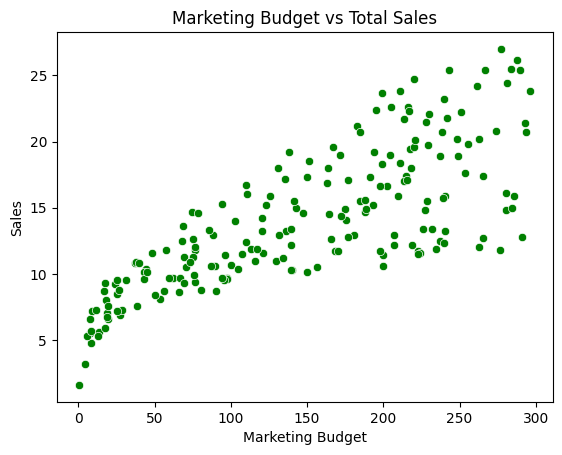

In [ ]:
sns.scatterplot(x=df["Marketing Budget"],y=df["Sales"],c="g")
plt.title("Marketing Budget vs Total Sales")

**Observation = Given Data is Linear**

**Checking for Outliers**

<Axes: >

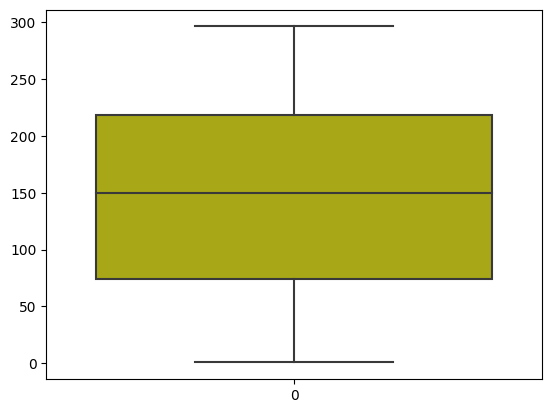

In [ ]:
sns.boxplot(df["Marketing Budget"],color="y")

<Axes: >

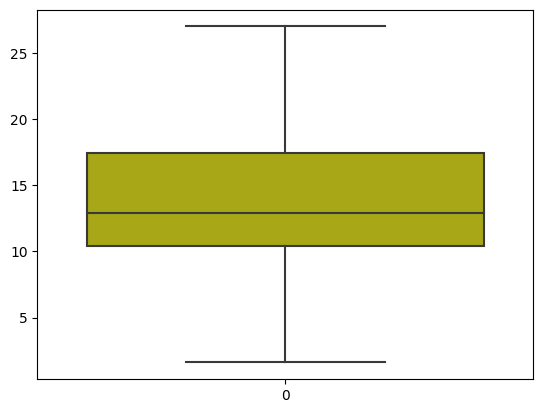

In [ ]:
sns.boxplot(df["Sales"],color="y")

Observations= Given Data has no outliers

**Check the Data Distribution Type**

<Axes: xlabel='Marketing Budget', ylabel='Count'>

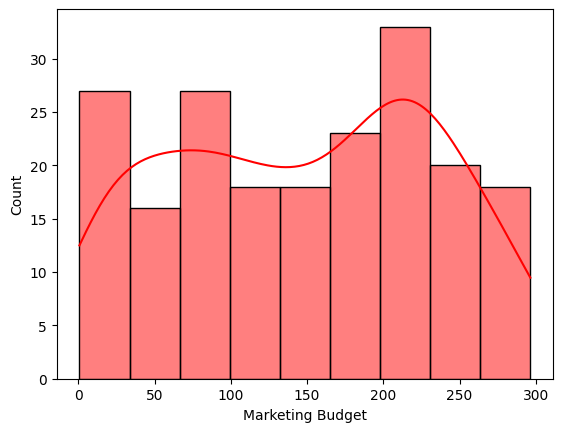

In [ ]:
sns.histplot(df["Marketing Budget"],color="r",kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

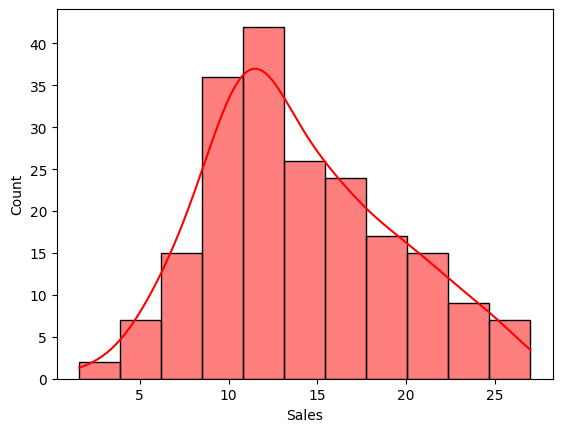

In [ ]:
sns.histplot(df["Sales"],color="r",kde=True)

**Observation** 

*   Marketing Budget count is nearly equal for all the budget, except 3 points

*   Sales Data is almost Normally Distributed




**Let's Standardize the Data**

In [ ]:
df

,Marketing Budget,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df["MD_Scaled"]=scaler.fit_transform(df[["Marketing Budget"]])

In [ ]:
df

,Marketing Budget,Sales,MD_Scaled
0,230.1,22.1,0.775786
1,44.5,10.4,0.148123
2,17.2,9.3,0.055800
3,151.5,18.5,0.509976
4,180.8,12.9,0.609063
...,...,...,...
195,38.2,7.6,0.126818
196,94.2,9.7,0.316199
197,177.0,12.8,0.596212
198,283.6,25.5,0.956713


**Let's see scatter plot using new scaled Data**

<Axes: xlabel='MD_Scaled', ylabel='Sales'>

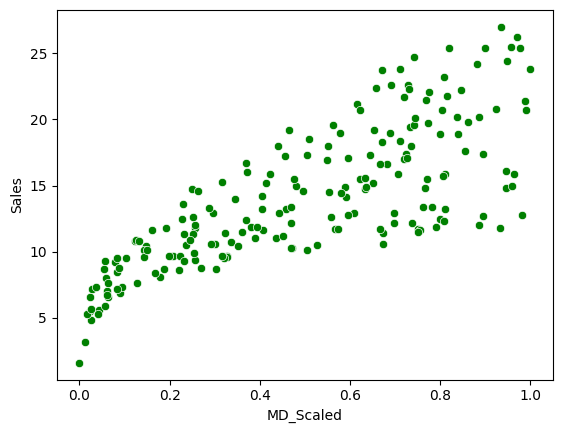

In [ ]:
sns.scatterplot(x=df["MD_Scaled"],y=df["Sales"],c="g")

**1.3 Build the Model**

**First split the data**

In [ ]:
x=df[["MD_Scaled"]]

In [ ]:
y=df["Sales"]

In [ ]:
x

,MD_Scaled
0,0.775786
1,0.148123
2,0.055800
3,0.509976
4,0.609063
...,...
195,0.126818
196,0.316199
197,0.596212
198,0.956713


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160,), (40,))

**Import the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

**Fit the Data into the model**

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

Now Predict the x_test values

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([10.65150665,  8.31417224,  7.47312303, 15.2185994 , 20.44581799,
        8.866722  , 17.086511  , 17.74174701, 20.92991026, 15.38485332,
       14.38244002, 12.31404576,  9.67843228, 14.71983767, 17.56082363,
       18.28451713, 11.38008997,  8.40707883, 16.72466425, 15.90317434,
       17.64395059, 18.80283815, 17.74663683, 13.86900882, 11.9717583 ,
       20.76365635, 17.1794176 ,  7.09660682, 13.38980637, 18.78816869,
       18.67081299, 14.38732984, 19.47274362, 14.0499322 , 17.93733985,
        8.92051003, 15.62445454, 13.7223142 , 18.01557698, 10.37767667])

**Checking the cost function metrics**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [ ]:
mse,mae,rmse

(12.45250476282902, 2.8767193483715596, 3.5288106725678867)

**Check the slope and intercept's**

In [ ]:
slope=model.coef_
slope

array([14.45920052])

In [ ]:
intercept=model.intercept_


In [ ]:
intercept

7.0966068213777875

**Results Visualization**

**Actual point vs best fit line points**

Text(0.5, 1.0, 'Actual Points vs Predicted Points')

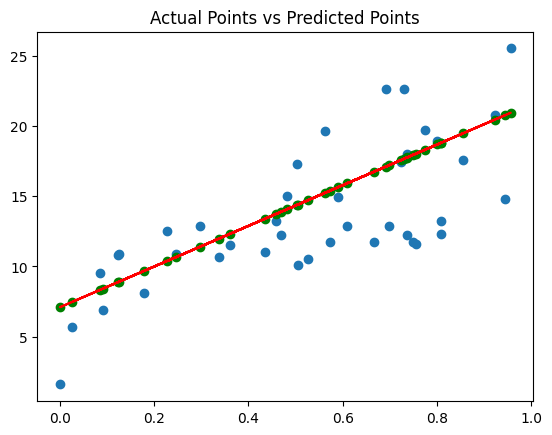

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,c="r")
plt.scatter(x_test,y_pred,c="g")
plt.title("Actual Points vs Predicted Points")

**SS Residual vs SS Tool**

In [ ]:
y_test=pd.DataFrame(y_test,columns=["Sales"])

In [ ]:
y_test["Mean"]=y_test["Sales"].mean()

Text(0.5, 1.0, 'SS Residuals vs SS Total')

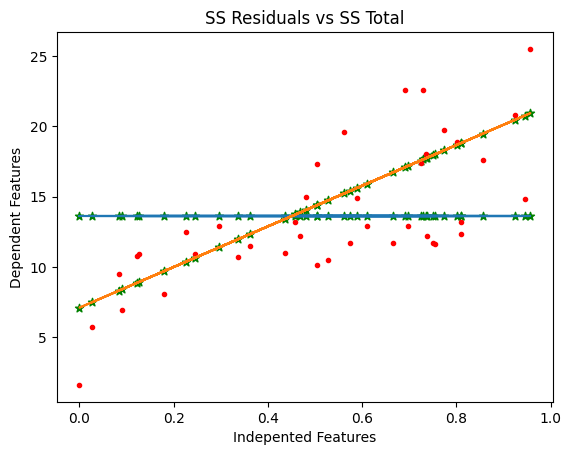

In [ ]:
plt.plot(x_test["MD_Scaled"],y_test["Mean"])
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_pred,c="g",marker="*")
plt.scatter(x_test["MD_Scaled"],y_test["Mean"],c="g",marker="*")
plt.scatter(x_test["MD_Scaled"],y_test["Sales"],c="r",marker=".")
plt.xlabel("Indepented Features")
plt.ylabel("Dependent Features")
plt.title("SS Residuals vs SS Total")